In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds="/kaggle/input/tomato/train"
test_ds="/kaggle/input/tomato/valid"


In [3]:
os.listdir('/kaggle/input/tomato/train')

['Late_blight',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Septoria_leaf_spot',
 'Early_blight',
 'Spider_mites Two-spotted_spider_mite',
 'powdery_mildew',
 'healthy',
 'Bacterial_spot',
 'Target_Spot',
 'Tomato_mosaic_virus',
 'Leaf_Mold']

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 25851 images belonging to 11 classes.
Found 6683 images belonging to 11 classes.


In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

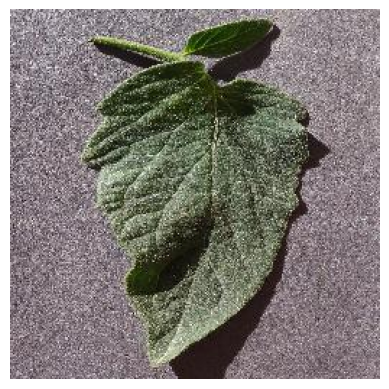

In [7]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/tomato/valid/healthy/01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509_flipTB.JPG"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
img= train_generator[0]
print(img)

(array([[[[153.1558  , 142.07098 , 138.4103  ],
         [151.65875 , 139.65875 , 139.65875 ],
         [154.66615 , 142.66615 , 142.66615 ],
         ...,
         [199.21869 , 195.21869 , 192.21869 ],
         [199.21869 , 195.21869 , 192.21869 ],
         [199.21869 , 195.21869 , 192.21869 ]],

        [[160.4871  , 149.40271 , 145.74033 ],
         [154.82558 , 142.82558 , 142.82558 ],
         [156.83821 , 144.83821 , 144.83821 ],
         ...,
         [200.      , 196.      , 193.      ],
         [200.      , 196.      , 193.      ],
         [200.      , 196.      , 193.      ]],

        [[167.9951  , 156.92906 , 153.22913 ],
         [177.43816 , 165.6378  , 165.23851 ],
         [170.20671 , 158.20671 , 158.20671 ],
         ...,
         [200.      , 196.      , 193.      ],
         [200.      , 196.      , 193.      ],
         [200.      , 196.      , 193.      ]],

        ...,

        [[151.65768 , 145.65768 , 147.65768 ],
         [130.7307  , 124.7307  , 126.7307  

In [9]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [10]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 11)


In [11]:
print(len(train_generator))
print(len(test_ds))

808
26


In [12]:
from keras.layers import MaxPool2D

In [13]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [14]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=11, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [16]:
import tensorflow.keras as keras

In [17]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [19]:
history =model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
808/808 [==============================] - 454s 561ms/step - loss: 0.5710 - accuracy: 0.7954 - val_loss: 0.5239 - val_accuracy: 0.8158
Epoch 2/15
808/808 [==============================] - 452s 559ms/step - loss: 0.4765 - accuracy: 0.8287 - val_loss: 0.5114 - val_accuracy: 0.8239
Epoch 3/15
808/808 [==============================] - 454s 562ms/step - loss: 0.4242 - accuracy: 0.8485 - val_loss: 0.4478 - val_accuracy: 0.8484
Epoch 4/15
808/808 [==============================] - 455s 562ms/step - loss: 0.3664 - accuracy: 0.8685 - val_loss: 0.5106 - val_accuracy: 0.8369
Epoch 5/15
808/808 [==============================] - 460s 569ms/step - loss: 0.3328 - accuracy: 0.8801 - val_loss: 0.3478 - val_accuracy: 0.8788
Epoch 6/15
808/808 [==============================] - 462s 571ms/step - loss: 0.2975 - accuracy: 0.8944 - val_loss: 0.5002 - val_accuracy: 0.8414
Epoch 7/15
808/808 [==============================] - 453s 560ms/step - loss: 0.2699 - accuracy: 0.9027 - val_loss: 0.3626 -

In [21]:
n_categories = len(os.listdir('/kaggle/input/tomato/train'))# number of categories print(n_categories)
n_categories

11

In [22]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.571050,0.795443,0.523907,0.815801
1,0.476493,0.828711,0.511366,0.823882
2,0.424240,0.848517,0.447814,0.848421
3,0.366442,0.868477,0.510619,0.836900
4,0.332784,0.880082,0.347836,0.878797


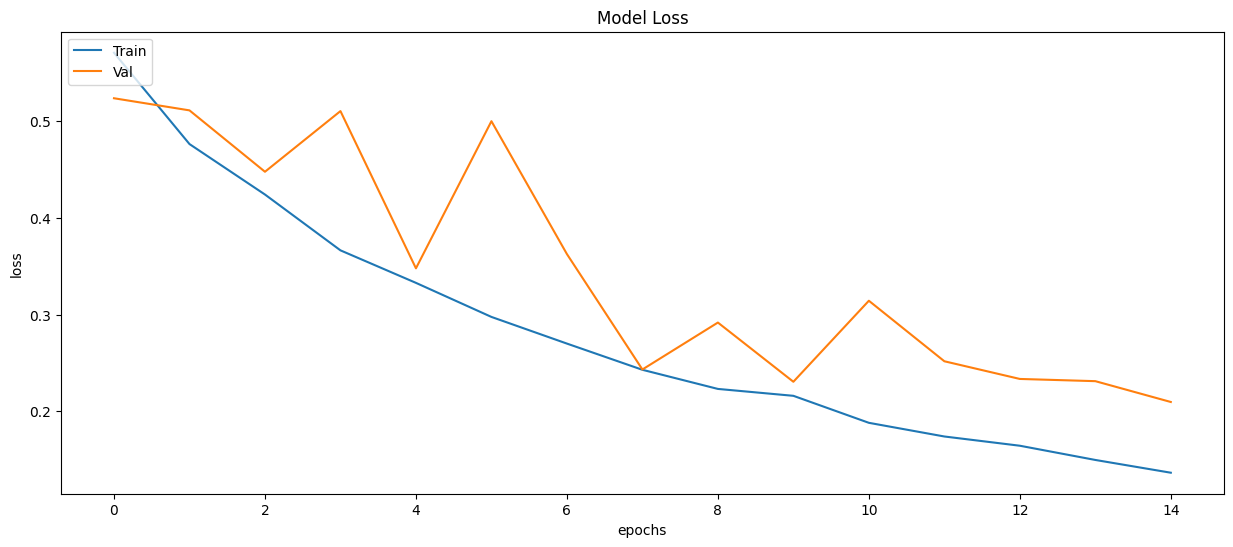

In [23]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

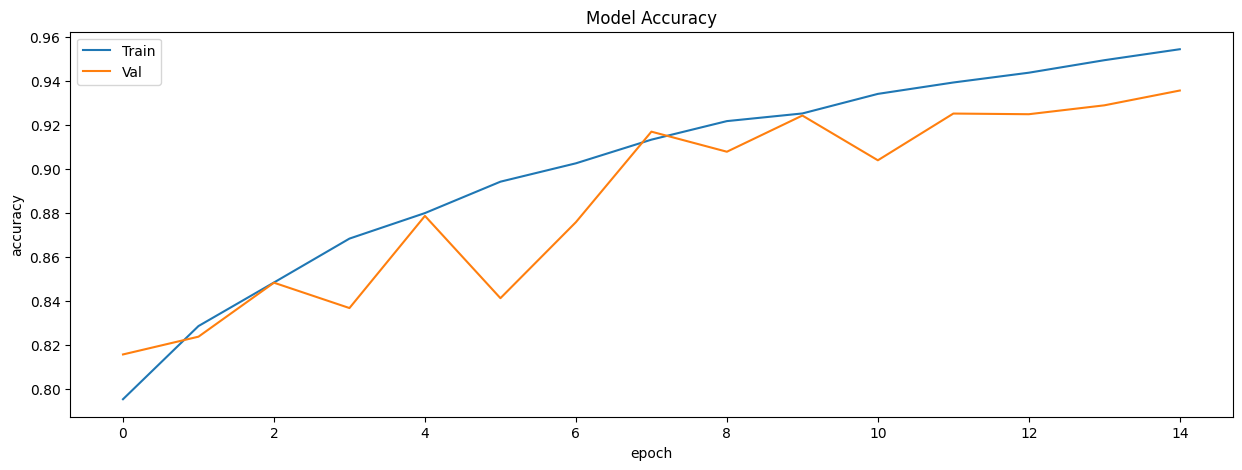

In [25]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [26]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

209/209 [==============================] - 32s 151ms/step


In [27]:
results =model.evaluate(test_generator)

209/209 [==============================] - 34s 163ms/step - loss: 0.2095 - accuracy: 0.9358


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91       732
           1       0.90      0.92      0.91       643
           2       0.88      0.94      0.91       792
           3       0.91      0.97      0.94       739
           4       0.94      0.87      0.90       746
           5       0.94      1.00      0.97       435
           6       0.98      0.89      0.93       457
           7       0.99      0.98      0.98       498
           8       0.99      0.97      0.98       584
           9       0.96      0.99      0.98       805
          10       0.81      0.88      0.84       252

    accuracy                           0.94      6683
   macro avg       0.93      0.93      0.93      6683
weighted avg       0.94      0.94      0.94      6683



15/15 [==============================] - 4s 286ms/step


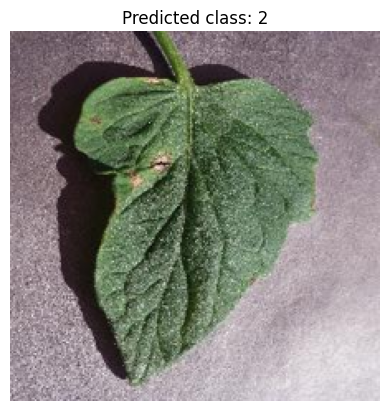

In [29]:

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/tomato/valid/Target_Spot'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [31]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {test_ds[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : a
Class probability: 0.9989906
Predicted class for 2.jpg : a
Class probability: 0.99877375
Predicted class for 3.jpg : a
Class probability: 0.9992575
Predicted class for 4.jpg : a
Class probability: 0.99903905
Predicted class for 5.jpg : a
Class probability: 0.99932265
Predicted class for 6.jpg : a
Class probability: 0.9898331
Predicted class for 7.jpg : a
Class probability: 0.99898356
Predicted class for 8.jpg : a
Class probability: 0.9988526
Predicted class for 9.jpg : a
Class probability: 0.99897206
Predicted class for 10.jpg : a
Class probability: 0.9989538
Predicted class for 11.jpg : a
Class probability: 0.9990392
Predicted class for 12.jpg : a
Class probability: 0.999046
Predicted class for 13.jpg : a
Class probability: 0.99874604
Predicted class for 14.jpg : a
Class probability: 0.99921775
Predicted class for 15.jpg : a
Class probability: 0.99881554
Predicted class for 16.jpg : a
Class probability: 0.99895656
Predicted class for 17.jpg : a
Class prob